## Открытие файлов с данными и изучение общей информации

In [105]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math
# Поочередно открываем датасеты
calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv')
messages_df = pd.read_csv('/datasets/messages.csv')
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

## Подготовка данных

### Подготовка данных датасета calls_df

In [106]:
calls_df.info()
# приведение call_date к типу datetime
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format="%Y/%m/%d")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [107]:
display(calls_df)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [108]:
# проверка датасета на наличие пропусков и дубликатов
print(calls_df.isna().sum())
print(calls_df.duplicated().sum())

id           0
call_date    0
duration     0
user_id      0
dtype: int64
0


<div class="alert alert-info">
<b>Комментарий:</b><br>
• Столбец call_date был приведен к типу datetime
</div>

### Подготовка данных датасета internet_df

In [109]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [110]:
display(internet_df)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [111]:
# Удаление столбца Unnamed: 0 и приведение session_date к datetime
del internet_df['Unnamed: 0']
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format="%Y/%m/%d")

In [112]:
# проверка датасета на наличие пропусков и дубликатов
print(internet_df.isna().sum())
print(internet_df.duplicated().sum())

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64
0


In [113]:
# Имеются записи, где объём потраченного за сессию интернет-трафика равен 0. Коль сессия была (есть запись), то 0 быть не может.
# Подсчёт количества таких записей
print(internet_df[internet_df['mb_used'] == 0].count())
# Т.к. 0 быть не может, то удаляем эти записи из дф
internet_df = internet_df[internet_df['mb_used'] > 0].reset_index(drop=True)

id              19598
mb_used         19598
session_date    19598
user_id         19598
dtype: int64


<div class="alert alert-info">
<b>Комментарий:</b><br>
• Был обнаружен и удален столбец Unnamed: 0.<br>
• Столбец session_date был приведен к типу datetime.<br>
• Были обнаружены записи, где интернет-трафик равен 0, что невозможно при выходе в интернет. Записи были удалены.<br>
</div>

### Подготовка данных датасета messages_df

In [114]:
messages_df.info()
display(messages_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [115]:
# Приведение massage_date к datetime
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format="%Y/%m/%d")

In [116]:
# проверка датасета на наличие пропусков и дубликатов
print(messages_df.isna().sum())
print(messages_df.duplicated().sum())

id              0
message_date    0
user_id         0
dtype: int64
0


<div class="alert alert-info">
<b>Комментарий:</b><br>
• Столбец message_date был приведет к типу datetime.
</div>

### Подготовка данных датасета tariffs_df

In [117]:
tariffs_df.info()
display(tariffs_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


### Подготовка данных датасета users_df

In [118]:
users_df.info()
display(users_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [119]:
# Приведение churn_date и reg_date к datetime
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format="%Y/%m/%d")
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format="%Y/%m/%d")

In [120]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [121]:
# проверка датасета на наличие пропусков и дубликатов
print(users_df.isna().sum())
print(users_df.duplicated().sum())

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64
0


<div class="alert alert-info">
<b>Комментарий:</b><br>
• Столбец churn_date был приведет к типу datetime.<br>
• Столбец reg_date был приведет к типу datetime.
</div>

### Подсчёты для каждого пользователя:

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [122]:
# создание копии calls_df с новым столбцом месяца
calls_df_with_month = calls_df
calls_df_with_month['duration'] = np.ceil(calls_df_with_month['duration']).astype(int)
calls_df_with_month['month'] = pd.DatetimeIndex(calls_df['call_date']).month

In [123]:
display(calls_df_with_month.head(10))

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
5,1000_5,2018-11-02,0,1000,11
6,1000_6,2018-10-18,0,1000,10
7,1000_7,2018-08-22,19,1000,8
8,1000_8,2018-09-15,19,1000,9
9,1000_9,2018-08-15,0,1000,8


##### Количество сделанных звонков каждым пользователем

In [124]:
#time_for_each_user = calls_df_with_month.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
#time_for_each_user2= time_for_each_user2.rename(columns={'id': 'number_of_calls'})
time_for_each_user = calls_df_with_month[['user_id', 'month', 'duration']]
display(time_for_each_user)

,user_id,month,duration
0,1000,7,0
1,1000,8,0
2,1000,6,3
3,1000,9,14
4,1000,12,6
...,...,...,...
202602,1499,12,1
202603,1499,10,19
202604,1499,11,11
202605,1499,10,5


In [125]:
time_for_each_user1= time_for_each_user.groupby(
    ['user_id', 'month'], as_index=False).agg({'duration': 'count'}).reset_index(drop=True)
time_for_each_user1 = time_for_each_user1.rename(columns={'duration': 'count_calls'})

In [126]:
display(time_for_each_user1)

,user_id,month,count_calls
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
...,...,...,...
3169,1498,10,41
3170,1499,9,9
3171,1499,10,68
3172,1499,11,74


##### Количество израсходованных минут разговора по месяцам каждым пользователем

In [127]:
count_minutes_by_months = calls_df_with_month.groupby(
    ['user_id', 'month'], as_index=False).agg({'duration': 'sum'}).reset_index(drop=True)
display(count_minutes_by_months)

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466
...,...,...,...
3169,1498,10,247
3170,1499,9,70
3171,1499,10,449
3172,1499,11,612


#### Количество отправленных сообщений по месяцам

In [128]:
# создание копии messages_df с новым столбцом месяца
messages_df_with_month = messages_df
messages_df_with_month['month'] = pd.DatetimeIndex(messages_df['message_date']).month
display(messages_df_with_month)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [129]:
count_messages_by_months = messages_df_with_month.groupby(
    ['user_id', 'month'], as_index=False).agg({'message_date': 'count'}).reset_index(drop=True)
count_messages_by_months= count_messages_by_months.rename(columns={'message_date': 'number_of_messages'})
display(count_messages_by_months)

,user_id,month,number_of_messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


#### Объем израсходованного интернет-трафика по месяцам

In [130]:
# создание копии internet_df с новым столбцом месяца
internet_df_with_month = internet_df
internet_df_with_month['month'] = pd.DatetimeIndex(internet_df['session_date']).month
display(internet_df_with_month)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...
129793,1499_151,752.72,2018-10-11,1499,10
129794,1499_152,318.90,2018-10-03,1499,10
129795,1499_153,490.13,2018-12-14,1499,12
129796,1499_155,1246.32,2018-11-26,1499,11


In [131]:
internet_df_with_month = internet_df_with_month.groupby(
    ['user_id', 'month'], as_index=False).agg({'mb_used': 'sum'}).reset_index(drop=True)
display(internet_df_with_month)

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3196,1498,10,20579.36
3197,1499,9,1845.75
3198,1499,10,17788.51
3199,1499,11,17963.31


In [132]:
print(internet_df_with_month.isna().sum())

user_id    0
month      0
mb_used    0
dtype: int64


#### Помесячная выручка с каждого пользователя

In [133]:
df = time_for_each_user1.merge(
    count_minutes_by_months, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer').merge(
    count_messages_by_months, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer').merge(
    internet_df_with_month, left_on=['user_id', 'month'], right_on=['user_id', 'month'], how='outer')
df = df.fillna(0)

In [134]:
display(df)

,user_id,month,count_calls,duration,number_of_messages,mb_used
0,1000,5,22.0,159.0,22.0,2253.49
1,1000,6,43.0,172.0,60.0,23233.77
2,1000,7,47.0,340.0,75.0,14003.64
3,1000,8,52.0,408.0,81.0,14055.93
4,1000,9,58.0,466.0,57.0,14568.91
...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30
3210,1489,10,0.0,0.0,21.0,19559.44
3211,1489,11,0.0,0.0,20.0,17491.56
3212,1489,12,0.0,0.0,35.0,17322.51


In [135]:
# Добавление тарифа в таблицу
smart_tariff = []
ultra_tariff = []
def tariff(row):
    if row['tariff'] == 'ultra':
        ultra_tariff.append(row['user_id'])
    else:
        smart_tariff.append(row['user_id'])
        
        
users_df.apply(tariff, axis=1)

def add_tariff(row):
    if row['user_id'] in smart_tariff:
        return 'smart'
    else:
        return 'ultra'



df['tariff'] = df.apply(add_tariff, axis=1)
display(df)

,user_id,month,count_calls,duration,number_of_messages,mb_used,tariff
0,1000,5,22.0,159.0,22.0,2253.49,ultra
1,1000,6,43.0,172.0,60.0,23233.77,ultra
2,1000,7,47.0,340.0,75.0,14003.64,ultra
3,1000,8,52.0,408.0,81.0,14055.93,ultra
4,1000,9,58.0,466.0,57.0,14568.91,ultra
...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,smart
3210,1489,10,0.0,0.0,21.0,19559.44,smart
3211,1489,11,0.0,0.0,20.0,17491.56,smart
3212,1489,12,0.0,0.0,35.0,17322.51,smart


In [136]:
display(tariffs_df)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [137]:
# Подсчёт помесячной выручки с каждого пользователя

def revenue_per_user(row):
    revenue = 0
    try:
        if row['tariff'] == 'smart':
            if row['duration'] > tariffs_df.loc[0]['minutes_included']:
                revenue += (row['duration'] - tariffs_df.loc[0]['minutes_included']) * tariffs_df.loc[0]['rub_per_minute']
            if row['number_of_messages'] > tariffs_df.loc[0]['messages_included']:
                revenue += ((row['number_of_messages'] - tariffs_df.loc[0]['messages_included']) 
                            * tariffs_df.loc[0]['rub_per_message'])
            if math.ceil(row['mb_used']/1024) > (tariffs_df.loc[0]['mb_per_month_included']/1024):
                revenue += ((math.ceil(row['mb_used']/1024) - (tariffs_df.loc[0]['mb_per_month_included']/1024))
                            * tariffs_df.loc[0]['rub_per_gb'])
            revenue += tariffs_df.loc[0]['rub_monthly_fee']
            return revenue
        else:
            if row['duration'] > tariffs_df.loc[1]['minutes_included']:
                revenue += (row['duration'] - tariffs_df.loc[1]['minutes_included']) * tariffs_df.loc[1]['rub_per_minute']
            if row['number_of_messages'] > tariffs_df.loc[1]['messages_included']:
                revenue += ((row['number_of_messages'] - tariffs_df.loc[1]['messages_included']) 
                            * tariffs_df.loc[1]['rub_per_message'])
            if math.ceil(row['mb_used']/1024) > (tariffs_df.loc[1]['mb_per_month_included']/1024):
                revenue += ((math.ceil(row['mb_used']/1024) - (tariffs_df.loc[1]['mb_per_month_included']/1024))
                            * tariffs_df.loc[1]['rub_per_gb'])
            revenue += tariffs_df.loc[1]['rub_monthly_fee']
            return revenue
    except:
        return 'Не удалось посчитать'

df['revenue'] = round(df.apply(revenue_per_user, axis=1))
display(df)

,user_id,month,count_calls,duration,number_of_messages,mb_used,tariff,revenue
0,1000,5,22.0,159.0,22.0,2253.49,ultra,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,ultra,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,ultra,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,ultra,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,ultra,1950.0
...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,smart,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,smart,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,smart,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,smart,950.0


<div class="alert alert-info">
<b>Комментарий:</b><br>
• Была сформирована таблица с месячными показателями каждого пользователя. Выручка округлена.
</div>

## Анализ данных

In [138]:
# Создание таблиц со средним, дисперсией и стандартным отклонением.
df_mean_var_std_duration = df.groupby(['tariff'])['duration'].agg(['mean', 'var', 'std'])
df_mean_var_std_messages = df.groupby(['tariff'])['number_of_messages'].agg(['mean', 'var', 'std'])
df_mean_var_std_mb = df.groupby(['tariff'])['mb_used'].agg(['mean', 'var', 'std'])
#df_mean_var_std = df.pivot_table(index= 'tariff', values='revenue', aggfunc= ['mean', 'var','std'])
display(df_mean_var_std_duration)
display(df_mean_var_std_messages)
display(df_mean_var_std_mb)

,mean,var,std
tariff,,,
smart,417.934948,36219.315784,190.313730
ultra,526.623350,100873.633397,317.606098


,mean,var,std
tariff,,,
smart,33.384029,796.812958,28.227876
ultra,49.363452,2285.266143,47.804457


,mean,var,std
tariff,,,
smart,16208.386990,3.446250e+07,5870.476681
ultra,19468.805208,1.017510e+08,10087.170752


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


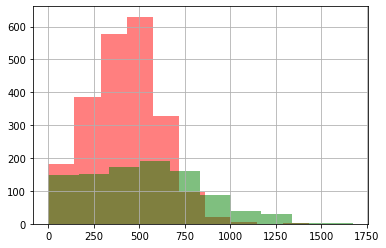

In [139]:
# Гистограмма длительности.
print(df.query('tariff == "smart"')['duration'].hist(bins=10, alpha=0.5, color='red'))
print(df.query('tariff == "ultra"')['duration'].hist(bins=10, alpha=0.5, color='green'))

<div class="alert alert-info">
<b>Комментарий:</b><br>
Гистограмма длительности звонков.<br>
Виднеется большая разница в количестве звонков между пользователями разных тарифов. Преобладают клиенты "Смарт"
</div>

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


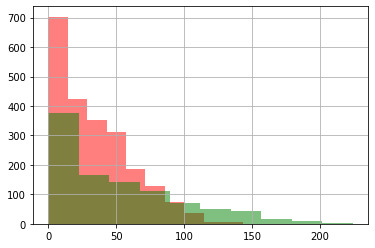

In [140]:
# Гистограмма смс.
print(df.query('tariff == "smart"')['number_of_messages'].hist(bins=10, alpha=0.5, color='red'))
print(df.query('tariff == "ultra"')['number_of_messages'].hist(bins=10, alpha=0.5, color='green'))

<div class="alert alert-info">
<b>Комментарий:</b><br>
Гистограмма количества смс.<br>
Пользователи различных тарифов приблизительно равны по количеству отправленных смс.
</div>

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


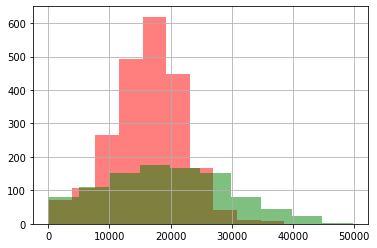

In [141]:
# Гистограмма интернету.
print(df.query('tariff == "smart"')['mb_used'].hist(bins=10, alpha=0.5, color='red'))
print(df.query('tariff == "ultra"')['mb_used'].hist(bins=10, alpha=0.5, color='green'))

<div class="alert alert-info">
<b>Комментарий:</b><br>
Гистограмма затраченного трафика на интернет.
</div>

## Проверка гипотез

#### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

<div class="alert alert-info">
<b>Комментарий :</b><br>
Примем за нулевую гипотезу, что средняя выручка пользователей различных тарифов равны.<br>
За альтернативную гипотезу возьмем, что выручка за тариф Ультра отличается от Смарт.
</div>

In [142]:
alpha = 0.05
# Двусторонняя гипотеза
results = st.ttest_ind(df.query('tariff == "smart"')['revenue'], df.query('tariff == "ultra"')['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу


##### Вывод:
<div class="alert alert-info">
<b>Комментарий:</b><br>
Была отвергнута нулевая гипотеза о равенстве выручки. Средняя выручка по тарифам действительно отличается.<br>
</div>

#### Cредняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

<div class="alert alert-info">
<b>Комментарий:</b><br>
Примем за нулевую гипотезу, что средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.<br>
За альтернативную гипотезу возьмем, что средняя выручка отличается.
</div>

In [ ]:
alpha = 0.05
# Двусторонняя гипотеза
results = st.ttest_ind(df.query('index != "Москва"')['revenue'], df.query('index == "Москва"')['revenue'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

##### Вывод:
<div class="alert alert-info">
<b>Комментарий:</b><br>
Не удалось отвергнуть нулевую гипотезу.<br>
</div>

## Общий вывод:

<div class="alert alert-info">
<b>Комментарий:</b><br>
В ходе проведения исследования и проверки гипотез можно сделать следующие выводы:<br>
Проверялись две гипотезы: средняя выручка между тарифами отличаются; средняя выручка между регионами и Москвой отличаются.<br>
Отвергнута была лишь первая гипотеза в пользу альтернативной.<br><br>
Исследуя гистограмы показателей по тарифами, видно, что частота тарифа Смарт больше почти по всем метрикам. Это связано с большим количеством пользователей этого тарифа.<br>
Более выгодным тарифом можно считать Ультра. Тк статистические показатели этого тарифа больше.
</div>